In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [58]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
## Training set
train = pd.read_csv("/kaggle/input/titanic/train.csv") 

## Test set
test  = pd.read_csv("/kaggle/input/titanic/test.csv") 

## Exploratory Data Analysis

In [60]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [62]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


### NULL Check

In [63]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
train.size

10692

In [65]:
male_age = train[train['Sex'] == 'male'].Age.mean()

In [66]:
female_age = train[train['Sex'] == 'female'].Age.mean()

In [67]:
train.loc[train['Sex'] == 'male', 'Age'] = train[train['Sex'] == 'male']['Age'].fillna(male_age)

In [68]:
train.loc[train['Sex'] == 'female', 'Age'] = train[train['Sex'] == 'female']['Age'].fillna(female_age)

In [69]:
test.loc[test['Sex'] == 'female', 'Age'] = test[test['Sex'] == 'female']['Age'].fillna(female_age)

In [70]:
test.loc[test['Sex'] == 'male', 'Age'] = test[test['Sex'] == 'male']['Age'].fillna(male_age)

### Drop Cabin Column

In [71]:
train.drop(['Cabin'], axis=1, inplace=True)

In [72]:
test.drop(['Cabin'], axis=1, inplace=True)

### Create family group

In [73]:
train["family_group"] = train["SibSp"] + train["Parch"] + 1

In [74]:
test["family_group"] = test["SibSp"] + test["Parch"] + 1

### Drop PassengerId, Ticket, Name, SibSp, Parch

In [75]:
train.drop(['PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)

In [76]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Embarked        2
family_group    0
dtype: int64

In [77]:
test.isnull().sum()

Pclass          0
Sex             0
Age             0
Fare            1
Embarked        0
family_group    0
dtype: int64

In [78]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

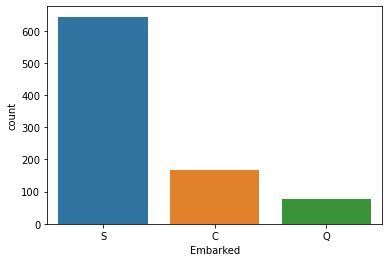

In [79]:
sns.countplot(train['Embarked'])

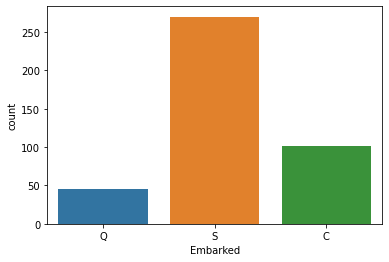

In [80]:
sns.countplot(test['Embarked'])

In [81]:
train['Embarked'] = train['Embarked'].fillna('S')

In [82]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
family_group    0
dtype: int64

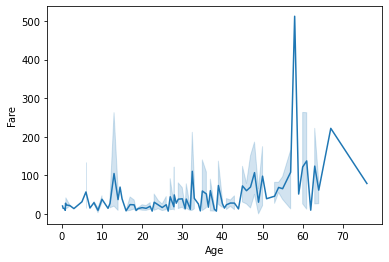

In [83]:
sns.lineplot(x=test.Age,y=test.Fare)

In [84]:
test[test.Fare.isnull()]

,Pclass,Sex,Age,Fare,Embarked,family_group
152,3,male,60.5,NaN,S,1


In [85]:
fare_50s = test[(test.Age >= 50) & (test.Age < 60)]['Fare'].mean()

In [86]:
test['Fare'] = test['Fare'].fillna(fare_50s)

In [87]:
test.isnull().sum()

Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
family_group    0
dtype: int64

### One-Hot Encoding

In [88]:
dummy_train = pd.get_dummies(train[['Sex', 'Embarked']])
dummy_test  = pd.get_dummies(test[['Sex', 'Embarked']])

train = pd.concat([train.drop(["Sex", "Embarked"], axis = 1), dummy_train], axis = 1)
test  = pd.concat([test.drop(["Sex", "Embarked"], axis = 1), dummy_test], axis = 1)

In [89]:
train.drop('Sex_female', axis=1, inplace=True)

In [90]:
test.drop('Sex_female', axis=1, inplace=True)

In [91]:
train = train.rename(columns={'Sex_male': 'Sex'})

In [92]:
train

,Survived,Pclass,Age,Fare,family_group,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,2,1,0,0,1
1,1,1,38.000000,71.2833,2,0,1,0,0
2,1,3,26.000000,7.9250,1,0,0,0,1
3,1,1,35.000000,53.1000,2,0,0,0,1
4,0,3,35.000000,8.0500,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,1,1,0,0,1
887,1,1,19.000000,30.0000,1,0,0,0,1
888,0,3,27.915709,23.4500,4,0,0,0,1
889,1,1,26.000000,30.0000,1,1,1,0,0


In [93]:
test = test.rename(columns={'Sex_male': 'Sex'})

In [94]:
test

,Pclass,Age,Fare,family_group,Sex,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,7.8292,1,1,0,1,0
1,3,47.000000,7.0000,2,0,0,0,1
2,2,62.000000,9.6875,1,1,0,1,0
3,3,27.000000,8.6625,1,1,0,0,1
4,3,22.000000,12.2875,3,0,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.726645,8.0500,1,1,0,0,1
414,1,39.000000,108.9000,1,0,1,0,0
415,3,38.500000,7.2500,1,1,0,0,1
416,3,30.726645,8.0500,1,1,0,0,1


In [95]:
test.isnull().sum()

Pclass          0
Age             0
Fare            0
family_group    0
Sex             0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

### Gender investigation

In [96]:
train.groupby(['Sex', 'Survived']).size().reset_index(name='No. of Survivors')

,Sex,Survived,No. of Survivors
0,0,0,81
1,0,1,233
2,1,0,468
3,1,1,109


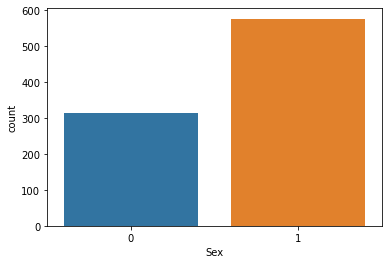

In [97]:
## Training Data
sns.countplot(x='Sex', data=train)

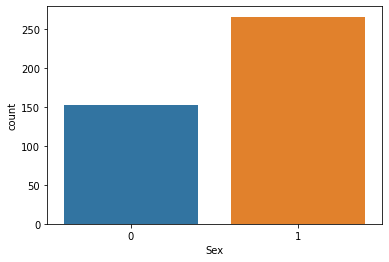

In [98]:
sns.countplot(x='Sex', data=test)

In [99]:
features = [
                'Pclass',
                'Age',
                'Fare',
                'family_group',
                'Sex',
                'Embarked_C',
                'Embarked_Q',
                'Embarked_S'
            ]
label    = ['Survived']
X_train = train[features]
y_train = train[label]

In [100]:
X_test = test[features]

In [101]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.3, random_state=3)

# Modeling

In [102]:
logisticRegression = LogisticRegression(max_iter=300, solver='liblinear')
logisticRegression.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=300, solver='liblinear')

In [103]:
predictions = logisticRegression.predict(X_valid)

In [104]:
accuracy = accuracy_score(predictions, y_valid)
print(accuracy * 100)

78.35820895522389


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, predictions)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       164
           1       0.72      0.73      0.72       104

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



array([[134,  30],
       [ 28,  76]])

## Submit

In [106]:
# One-hot encoding
# test[['Female', 'Male']] = pd.get_dummies(test['Sex'])
testPrediction = logisticRegression.predict(X_test)

In [107]:
X_test

,Pclass,Age,Fare,family_group,Sex,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,7.8292,1,1,0,1,0
1,3,47.000000,7.0000,2,0,0,0,1
2,2,62.000000,9.6875,1,1,0,1,0
3,3,27.000000,8.6625,1,1,0,0,1
4,3,22.000000,12.2875,3,0,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.726645,8.0500,1,1,0,0,1
414,1,39.000000,108.9000,1,0,1,0,0
415,3,38.500000,7.2500,1,1,0,0,1
416,3,30.726645,8.0500,1,1,0,0,1


In [108]:
## Test set
passenger_id  = pd.read_csv("/kaggle/input/titanic/test.csv")['PassengerId']

In [109]:
submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": testPrediction
})

In [110]:
submission.to_csv('/kaggle/working/submission.csv', index=False)